In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('/Users/bsu/Downloads/round-1-island-data-bottle/prices_round_1_day_-2.csv', delimiter = ';')

In [4]:
#make a new df for only rainforest_resin data
rainforest_resin = df[df['product'] == 'RAINFOREST_RESIN']
rainforest_resin.reset_index(inplace=True)
max_value = rainforest_resin['mid_price'].max()
min_value = rainforest_resin['mid_price'].min()

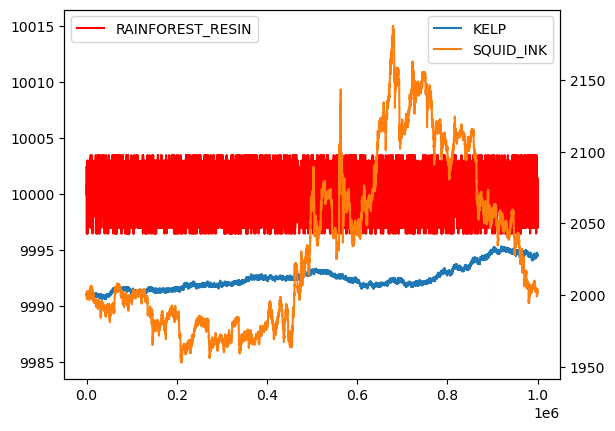

In [5]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#plot the three graphs
for product in df['product'].unique():
    product_df = df[df['product'] == product]
    if product == 'RAINFOREST_RESIN':
        ax1.plot(product_df['timestamp'], product_df['mid_price'], label=product, color = 'red')
    else:
        ax2.plot(product_df['timestamp'], product_df['mid_price'], label=product)

ax1.set_ylim([max_value - 20, min_value + 20])
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [6]:
rainforest_resin['mid_price']

0       10000.0
1       10002.5
2       10000.0
3       10000.0
4        9996.5
         ...   
9995    10000.0
9996    10001.5
9997    10000.0
9998     9997.0
9999    10000.0
Name: mid_price, Length: 10000, dtype: float64

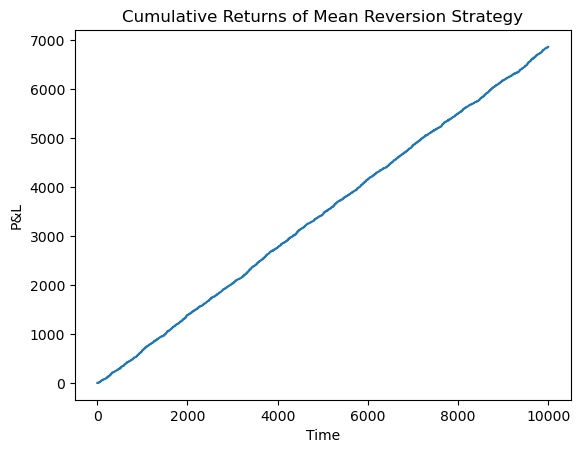

In [25]:
lookback = 20
rainforest_resin['sma'] = rainforest_resin['mid_price'].rolling(window=lookback).mean()
rainforest_resin['std'] = rainforest_resin['mid_price'].rolling(window=lookback).std()

rainforest_resin['z_score'] = (rainforest_resin['mid_price']-rainforest_resin['sma']) / rainforest_resin['std']


rainforest_resin['signal'] = 0
rainforest_resin.loc[rainforest_resin['z_score'] > 1, 'signal'] = -1
rainforest_resin.loc[rainforest_resin['z_score'] < -1, 'signal'] = 1

rainforest_resin["position"] = rainforest_resin["signal"].shift().copy()
rainforest_resin["price_change"] = rainforest_resin["mid_price"].diff().copy()
rainforest_resin["strategy_returns"] = rainforest_resin["position"] * rainforest_resin["price_change"]

# Cumulative returns
rainforest_resin["cumulative_returns"] = rainforest_resin["strategy_returns"].cumsum()
rainforest_resin["cumulative_returns"].plot(title="Cumulative Returns of Mean Reversion Strategy")
plt.xlabel("Time")
plt.ylabel("P&L")
plt.show()

In [22]:
pd.set_option('display.max_rows', 25)
rainforest_resin

,index,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,...,mid_price,profit_and_loss,sma,std,z_score,signal,position,price_change,strategy_returns,cumulative_returns
0,0,-2,0,RAINFOREST_RESIN,9996,1,9995.0,25.0,NaN,NaN,...,10000.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,4,-2,100,RAINFOREST_RESIN,10000,5,9995.0,20.0,NaN,NaN,...,10002.5,0.0,NaN,NaN,NaN,0,0.0,2.5,0.0,NaN
2,8,-2,200,RAINFOREST_RESIN,9996,1,9995.0,30.0,NaN,NaN,...,10000.0,0.0,NaN,NaN,NaN,0,0.0,-2.5,-0.0,NaN
3,9,-2,300,RAINFOREST_RESIN,9996,1,9995.0,26.0,NaN,NaN,...,10000.0,0.0,NaN,NaN,NaN,0,0.0,0.0,0.0,NaN
4,12,-2,400,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,...,9996.5,0.0,NaN,NaN,NaN,0,0.0,-3.5,-0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,29985,-2,999500,RAINFOREST_RESIN,9996,2,9995.0,24.0,NaN,NaN,...,10000.0,0.0,10000.0575,1.460689,-0.039365,0,0.0,0.0,0.0,NaN
9996,29988,-2,999600,RAINFOREST_RESIN,9998,6,9995.0,30.0,NaN,NaN,...,10001.5,0.0,10000.0650,1.464239,0.980031,0,0.0,1.5,0.0,NaN
9997,29993,-2,999700,RAINFOREST_RESIN,9995,22,NaN,NaN,NaN,NaN,...,10000.0,0.0,10000.0700,1.462290,-0.047870,0,0.0,-1.5,-0.0,NaN
9998,29995,-2,999800,RAINFOREST_RESIN,9996,1,9995.0,25.0,NaN,NaN,...,9997.0,0.0,10000.0600,1.476414,-2.072589,1,0.0,-3.0,-0.0,NaN


In [11]:
squid_ink = df[df['product'] == 'SQUID_INK']
squid_ink.reset_index(inplace=True)

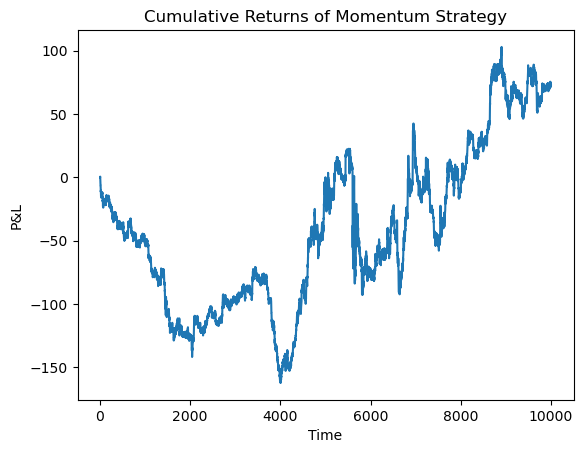

,index,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,...,ask_volume_3,mid_price,profit_and_loss,EMA_9,EMA_22,signal,position,price_change,strategy_returns,cumulative_returns
0,2,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,...,NaN,2000.0,0.0,2000.000000,2000.000000,0,NaN,NaN,NaN,NaN
1,3,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,...,NaN,2000.0,0.0,2000.000000,2000.000000,0,0.0,0.0,0.0,0.0
2,7,-2,200,SQUID_INK,1997,31,NaN,NaN,NaN,NaN,...,NaN,1998.5,0.0,1999.700000,1999.869565,-1,0.0,-1.5,-0.0,0.0
3,11,-2,300,SQUID_INK,1997,27,NaN,NaN,NaN,NaN,...,NaN,1998.5,0.0,1999.460000,1999.750473,-1,-1.0,0.0,-0.0,0.0
4,14,-2,400,SQUID_INK,1996,20,NaN,NaN,NaN,NaN,...,NaN,1998.0,0.0,1999.168000,1999.598258,-1,-1.0,-0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,29986,-2,999500,SQUID_INK,2000,26,NaN,NaN,NaN,NaN,...,NaN,2001.5,0.0,2001.163596,2001.348202,-1,-1.0,-1.0,1.0,73.0
9996,29990,-2,999600,SQUID_INK,2001,30,NaN,NaN,NaN,NaN,...,NaN,2002.5,0.0,2001.430877,2001.448358,-1,-1.0,1.0,-1.0,72.0
9997,29992,-2,999700,SQUID_INK,2001,22,NaN,NaN,NaN,NaN,...,NaN,2003.0,0.0,2001.744701,2001.583283,1,-1.0,0.5,-0.5,71.5
9998,29994,-2,999800,SQUID_INK,2002,26,NaN,NaN,NaN,NaN,...,NaN,2003.0,0.0,2001.995761,2001.706476,1,1.0,0.0,0.0,71.5


In [26]:
squid_ink['EMA_9'] = squid_ink['mid_price'].ewm(span=9, adjust=False).mean()
squid_ink['EMA_22'] = squid_ink['mid_price'].ewm(span=22, adjust=False).mean()

squid_ink['signal'] = 0
squid_ink.loc[squid_ink['EMA_9'] > squid_ink['EMA_22'], 'signal'] = 1
squid_ink.loc[squid_ink['EMA_9'] < squid_ink['EMA_22'], 'signal'] = -1

squid_ink["position"] = squid_ink["signal"].shift().copy()
squid_ink["price_change"] = squid_ink["mid_price"].diff().copy()
squid_ink["strategy_returns"] = squid_ink["position"] * squid_ink["price_change"]

# Cumulative returns
squid_ink["cumulative_returns"] = squid_ink["strategy_returns"].cumsum()

squid_ink["cumulative_returns"].plot(title="Cumulative Returns of Momentum Strategy")
plt.xlabel("Time")
plt.ylabel("P&L")
plt.show()
squid_ink


